In [1]:
import pandas as pd
import datetime
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Exercise 3

In [2]:
data=pd.read_csv('dataUS.csv', header = None).T
data=data.shift(-1)
data.columns=['GDP', 'Real Consumption', 'Real Investment', 'Real GDP']
data=data.drop(data.index[188])
data.index=pd.period_range('1969-01', periods=188, freq='Q-DEC')

In [3]:
data['GDP']=[float(m.replace(',','')) for m in np.array(data['GDP'])]
data['Real Consumption']=[float(m.replace(',','')) for m in np.array(data['Real Consumption'])]
data['Real Investment']=[float(m.replace(',','')) for m in np.array(data['Real Investment'])]
data['Real GDP']=[float(m.replace(',','')) for m in np.array(data['Real GDP'])]

In [4]:
data['GDP Deflator']=100*data['GDP']/data['Real GDP']

In [5]:
rgdpfreq, rgdpper=sig.periodogram(np.array(data['Real GDP']),axis=0)
confreq, conper=sig.periodogram(np.array(data['Real Consumption']),axis=0)
invfreq, invper=sig.periodogram(np.array(data['Real Investment']),axis=0)
deffreq, defper=sig.periodogram(np.array(data['GDP Deflator']),axis=0)

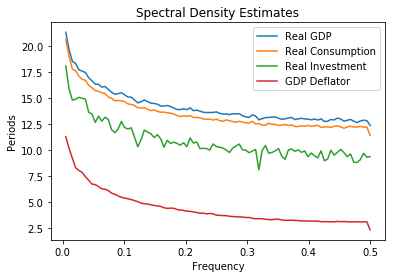

In [6]:
plt.plot(rgdpfreq[1:], np.log(rgdpper)[1:], label='Real GDP')
plt.plot(confreq[1:], np.log(conper)[1:], label='Real Consumption')
plt.plot(invfreq[1:], np.log(invper)[1:], label='Real Investment')
plt.plot(deffreq[1:], np.log(defper)[1:], label='GDP Deflator')
plt.xlabel('Frequency')
plt.ylabel('Periods')
plt.legend()
plt.title('Spectral Density Estimates')
plt.show()

# Exercise 4

In [7]:
rcy, rtr = sm.tsa.filters.hpfilter(np.array(data['Real GDP']), 1600)
concy, contr=sm.tsa.filters.hpfilter(np.array(data['Real Consumption']), 1600)
invcy, invtr=sm.tsa.filters.hpfilter(np.array(data['Real Investment']), 1600)
defcy, devtr=sm.tsa.filters.hpfilter(np.array(data['GDP Deflator']), 1600)

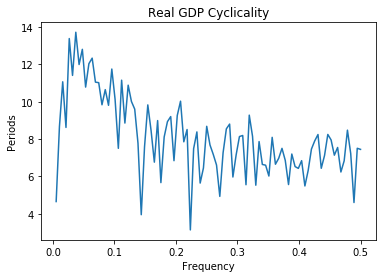

In [8]:
rcyfreq, rcyper=sig.periodogram(rcy,axis=0)
plt.plot(rcyfreq[1:], np.log(rcyper[1:]))
plt.xlabel('Frequency')
plt.ylabel('Periods')
plt.title('Real GDP Cyclicality')
plt.show()

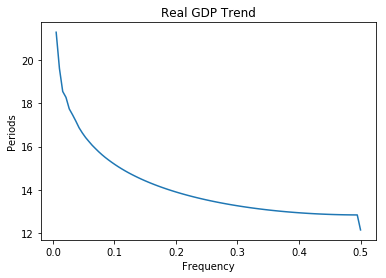

In [9]:
rtrfreq, rtrper=sig.periodogram(rtr,axis=0)
plt.plot(rtrfreq[1:], np.log(rtrper[1:]))
plt.xlabel('Frequency')
plt.ylabel('Periods')
plt.title('Real GDP Trend')
plt.show()

The other time series can be filtered and estimated the same.

# Exercise 5

In [10]:
gdpcy1, gdptr1=sm.tsa.filters.hpfilter(np.array(data['Real GDP']), 100)
gdpcy2, gdptr2=sm.tsa.filters.hpfilter(np.array(data['Real GDP']), 400)
gdpcy3, gdptr3=sm.tsa.filters.hpfilter(np.array(data['Real GDP']), 1600)
gdpcy4, gdptr4=sm.tsa.filters.hpfilter(np.array(data['Real GDP']), 6400)
gdpcy5, gdptr5=sm.tsa.filters.hpfilter(np.array(data['Real GDP']), 25600)

In [11]:
invcy1, invtr1=sm.tsa.filters.hpfilter(np.array(data['Real Investment']), 100)
invcy2, invtr2=sm.tsa.filters.hpfilter(np.array(data['Real Investment']), 400)
invcy3, invtr3=sm.tsa.filters.hpfilter(np.array(data['Real Investment']), 1600)
invcy4, invtr4=sm.tsa.filters.hpfilter(np.array(data['Real Investment']), 6400)
invcy5, invtr5=sm.tsa.filters.hpfilter(np.array(data['Real Investment']), 25600)

In [12]:
print('For lambda=100, standard deviation of investment=',invtr1.std(),'correlation with GDP=',\
     np.corrcoef(invtr1,gdptr1)[0,1],'autocorrelation=',np.corrcoef(invtr1[1:],invtr1[:-1])[0,1])
print('For lambda=400, standard deviation of investment=',invtr2.std(),'correlation with GDP=',\
     np.corrcoef(invtr2,gdptr2)[0,1],'autocorrelation=',np.corrcoef(invtr2[1:],invtr2[:-1])[0,1])
print('For lambda=1600, standard deviation of investment=',invtr3.std(),'correlation with GDP=',\
     np.corrcoef(invtr3,gdptr3)[0,1],'autocorrelation=',np.corrcoef(invtr3[1:],invtr3[:-1])[0,1])
print('For lambda=6400, standard deviation of investment=',invtr4.std(),'correlation with GDP=',\
     np.corrcoef(invtr4,gdptr4)[0,1],'autocorrelation=',np.corrcoef(invtr4[1:],invtr4[:-1])[0,1])
print('For lambda=25600, standard deviation of investment=',invtr5.std(),'correlation with GDP=',\
     np.corrcoef(invtr5,gdptr5)[0,1],'autocorrelation=',np.corrcoef(invtr5[1:],invtr5[:-1])[0,1])


For lambda=100, standard deviation of investment= 719.143476967 correlation with GDP= 0.977939104122 autocorrelation= 0.99940673159
For lambda=400, standard deviation of investment= 715.362057834 correlation with GDP= 0.981096624179 autocorrelation= 0.999630390815
For lambda=1600, standard deviation of investment= 710.918117801 correlation with GDP= 0.984891064053 autocorrelation= 0.999787356985
For lambda=6400, standard deviation of investment= 705.664029563 correlation with GDP= 0.989642857407 autocorrelation= 0.99989227893
For lambda=25600, standard deviation of investment= 700.448035261 correlation with GDP= 0.994243101444 autocorrelation= 0.999951444272


Other time series can be done the same.

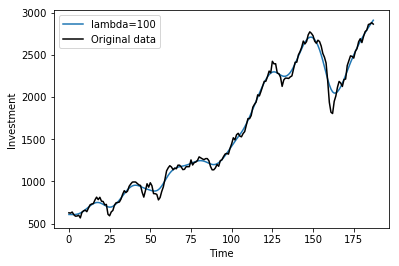

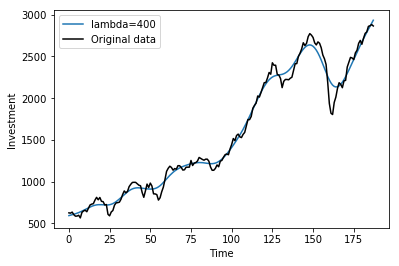

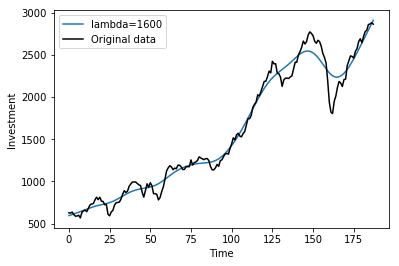

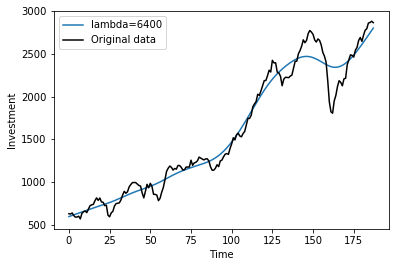

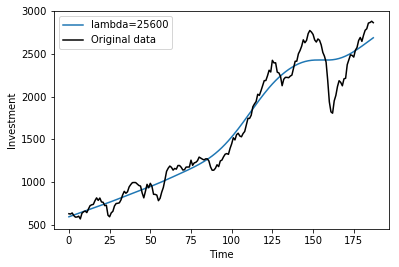

In [13]:
plt.plot(range(188), invtr1, label='lambda=100')
plt.plot(range(188), (np.array(data['Real Investment'])),'k',label='Original data')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Investment')
plt.show()
plt.plot(range(188), (invtr2),label='lambda=400')
plt.plot(range(188), (np.array(data['Real Investment'])),'k',label='Original data')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Investment')
plt.show()
plt.plot(range(188), (invtr3),label='lambda=1600')
plt.plot(range(188), (np.array(data['Real Investment'])),'k',label='Original data')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Investment')
plt.show()
plt.plot(range(188), (invtr4),label='lambda=6400')
plt.plot(range(188), (np.array(data['Real Investment'])),'k',label='Original data')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Investment')
plt.show()
plt.plot(range(188), (invtr5),label='lambda=25600')
plt.plot(range(188), (np.array(data['Real Investment'])),'k',label='Original data')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Investment')
plt.show()

# Exercise 6

CF Filter, the other filters can be done the same.

In [22]:
rGDP=np.array(data['Real GDP'])
con=np.array(data['Real Consumption'])
inv=np.array(data['Real Investment'])
deflator=np.array(data['GDP Deflator'])
rGDPtr=sm.tsa.filters.cffilter(rGDP,low=6,high=32,drift=True)[1]
contr=sm.tsa.filters.cffilter(con,low=6,high=32,drift=True)[1]
invtr=sm.tsa.filters.cffilter(inv,low=6,high=32,drift=True)[1]
deflatortr=sm.tsa.filters.cffilter(deflator,low=6,high=32,drift=True)[1]
std=np.array([rGDPtr.std(),contr.std(),invtr.std(),deflatortr.std()])
relstd=std/rGDPtr.std()
autocor=np.array([np.corrcoef(rGDPtr[1:],rGDPtr[:-1])[0,1],\
                  np.corrcoef(contr[1:],contr[:-1])[0,1], \
                  np.corrcoef(invtr[1:],invtr[:-1])[0,1],\
                  np.corrcoef(deflatortr[1:],deflatortr[:-1])[0,1]])
corgdp=np.array([np.corrcoef(rGDPtr,rGDPtr)[0,1],np.corrcoef(contr,rGDPtr)[0,1],\
                np.corrcoef(invtr,rGDPtr)[0,1],np.corrcoef(deflatortr,rGDPtr)[0,1]])
                

In [25]:
table=pd.DataFrame({'standard deviation': std, 'std relative to GDP': relstd,\
                    'autocorrelation': autocor,'correlation with GDP' :corgdp})
table.index=['GDP','Consumption','Investment','GDP Deflator']
table

,autocorrelation,correlation with GDP,standard deviation,std relative to GDP
GDP,0.994766,1.000000,543.647758,1.000000
Consumption,0.997254,0.961847,418.009171,0.768897
Investment,0.981592,0.758557,204.502143,0.376167
GDP Deflator,0.997298,-0.520339,2.394718,0.004405
